# Week Three - Part 2 
## Assignment Data Sets (DATA 620)
#### Authors: John Mazon, Leticia Cancel, Bharani Nittala

Video: https://www.youtube.com/watch?v=yqOXYzJ-HNg

# Import libraries

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
#NetworkX is a Python package for the creation, manipulation, and study of the 
#structure, dynamics, and functions of complex networks.

#This module provides functions and operations for bipartite graphs. 
#Bipartite graphs B = (U, V, E) have two node sets U,V and edges in E that only connect nodes from opposite sets. 
#It is common in the literature to use an spatial analogy referring to the two node sets as top and bottom nodes.

# Description

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

    Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and 
    comparing new network algorithms.
    
    Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
Analysis: What can you infer about the relationships between (1) the women, and (2) the social events?  


+ Load network and get basic information of graph

In [13]:
G = nx.davis_southern_women_graph()
women=G.graph["top"]
clubs=G.graph["bottom"]

print(nx.info(G))

#we are placing into G our davis_southern_women_graph
#returns Return Davis Southern women social network. This is a bipartite graph.

#we are able to see that there are 32 nodes and 89 edges, with avg degree of 5.5625

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the properties of those graphs.
These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The graph is bipartite (clubs, women).

+ Print Biadjaceny matrix

In [14]:
print(bipartite.biadjacency_matrix(G, women, clubs))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [15]:
G.nodes()
#using the g.nodes() we are able to clearly depict all the present nodes including women and events

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

<function matplotlib.pyplot.show(close=None, block=None)>

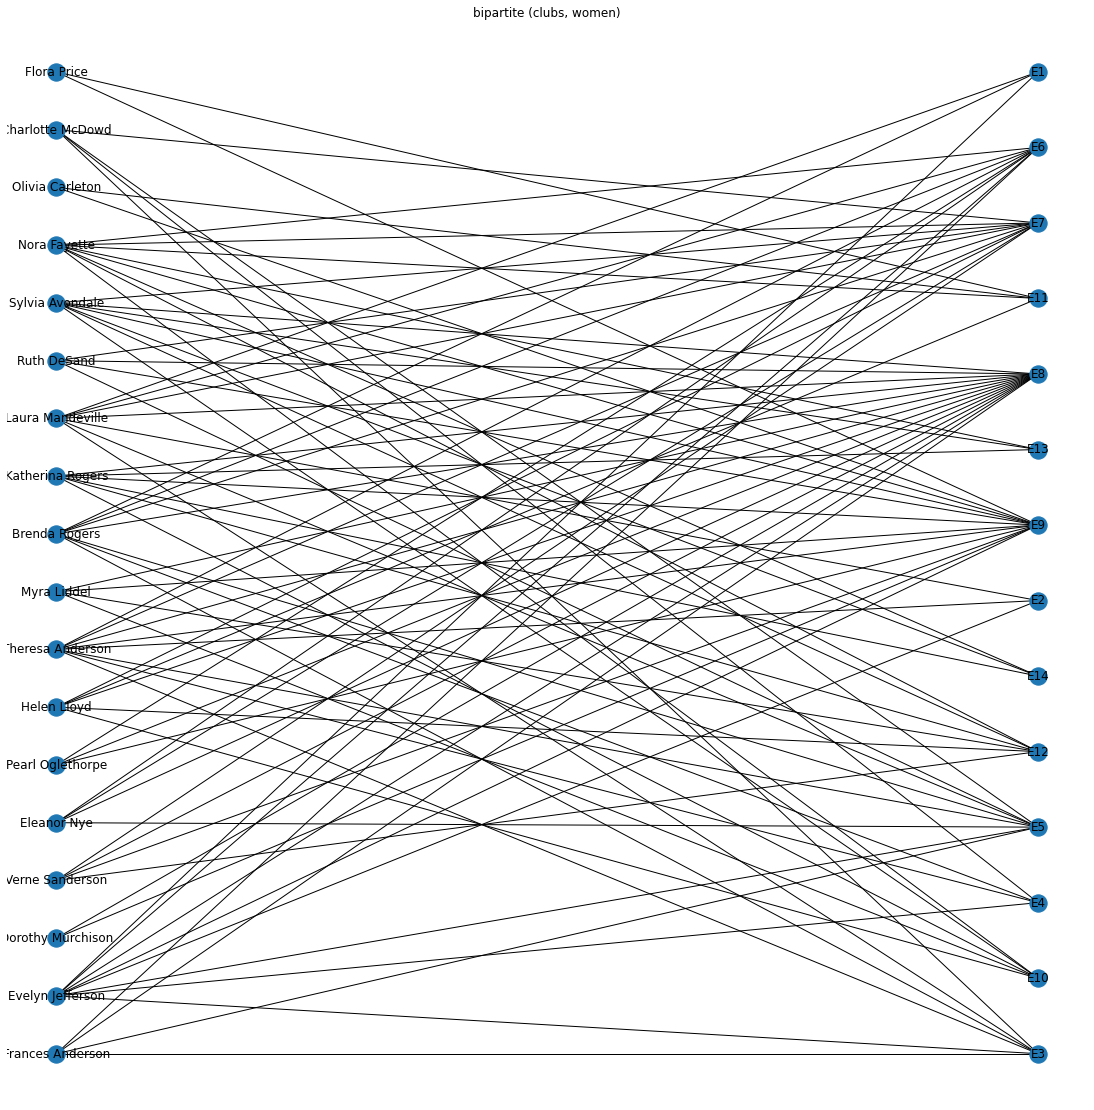

In [10]:
#Draw Graph
plt.figure(figsize=(15,15))
nx.draw(G, with_labels=True, pos=nx.bipartite_layout(G, G.graph["top"]) )
plt.title('bipartite (clubs, women)')
plt.show

#The purpose of using plt.figure() is to create a figure object.
#The whole figure is regarded as the figure object. It is necessary to explicitly use plt.figure() 
#when we want to tweak the size of the figure and when we want to add multiple Axes objects in a single figure.

#When displaying the graph in this manner, we are able to clearly see the women on left side and events on the
#right side. From here we can depict which events each woman attended. 

In [6]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")
    
#above new graph, shows how the women are connected to other women who attended the same event. 
#Returns the projection of B onto one of its node sets.
#from here we can see if each woman was present at an event together

#Returns the graph G that is the projection of the bipartite graph B onto the specified nodes. 
#They retain their attributes and are connected in G if they have a common neighbor in B.


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [7]:
# project bipartite graph onto women nodes keeping number of co-occurence
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='edges')} {w}")
    
#from here we are able to store weights
#We could analyze how many events the women were together at


#Friend meetings, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [16]:
nx.get_edge_attributes(W, "weight")
#using the get_edge_attributes function we are able to neatly see each node(s) along with corresponding weight

{('Evelyn Jefferson', 'Eleanor Nye'): 3,
 ('Evelyn Jefferson', 'Sylvia Avondale'): 2,
 ('Evelyn Jefferson', 'Katherina Rogers'): 2,
 ('Evelyn Jefferson', 'Nora Fayette'): 2,
 ('Evelyn Jefferson', 'Charlotte McDowd'): 3,
 ('Evelyn Jefferson', 'Frances Anderson'): 4,
 ('Evelyn Jefferson', 'Dorothy Murchison'): 2,
 ('Evelyn Jefferson', 'Verne Sanderson'): 2,
 ('Evelyn Jefferson', 'Pearl Oglethorpe'): 3,
 ('Evelyn Jefferson', 'Helen Lloyd'): 1,
 ('Evelyn Jefferson', 'Theresa Anderson'): 7,
 ('Evelyn Jefferson', 'Myra Liddel'): 2,
 ('Evelyn Jefferson', 'Brenda Rogers'): 6,
 ('Evelyn Jefferson', 'Laura Mandeville'): 6,
 ('Evelyn Jefferson', 'Olivia Carleton'): 1,
 ('Evelyn Jefferson', 'Ruth DeSand'): 3,
 ('Evelyn Jefferson', 'Flora Price'): 1,
 ('Laura Mandeville', 'Eleanor Nye'): 4,
 ('Laura Mandeville', 'Sylvia Avondale'): 2,
 ('Laura Mandeville', 'Katherina Rogers'): 1,
 ('Laura Mandeville', 'Nora Fayette'): 2,
 ('Laura Mandeville', 'Charlotte McDowd'): 3,
 ('Laura Mandeville', 'Frances A

In [24]:
filtered_edges
#here we display the filter edges depicting clearly which women attended an event/formed an edge

[('Evelyn Jefferson', 'Eleanor Nye'),
 ('Evelyn Jefferson', 'Charlotte McDowd'),
 ('Evelyn Jefferson', 'Frances Anderson'),
 ('Evelyn Jefferson', 'Pearl Oglethorpe'),
 ('Evelyn Jefferson', 'Theresa Anderson'),
 ('Evelyn Jefferson', 'Brenda Rogers'),
 ('Evelyn Jefferson', 'Laura Mandeville'),
 ('Evelyn Jefferson', 'Ruth DeSand'),
 ('Laura Mandeville', 'Eleanor Nye'),
 ('Laura Mandeville', 'Charlotte McDowd'),
 ('Laura Mandeville', 'Frances Anderson'),
 ('Laura Mandeville', 'Theresa Anderson'),
 ('Laura Mandeville', 'Brenda Rogers'),
 ('Laura Mandeville', 'Ruth DeSand'),
 ('Theresa Anderson', 'Eleanor Nye'),
 ('Theresa Anderson', 'Sylvia Avondale'),
 ('Theresa Anderson', 'Nora Fayette'),
 ('Theresa Anderson', 'Charlotte McDowd'),
 ('Theresa Anderson', 'Frances Anderson'),
 ('Theresa Anderson', 'Verne Sanderson'),
 ('Theresa Anderson', 'Pearl Oglethorpe'),
 ('Theresa Anderson', 'Brenda Rogers'),
 ('Theresa Anderson', 'Ruth DeSand'),
 ('Brenda Rogers', 'Eleanor Nye'),
 ('Brenda Rogers', 'C

In [26]:
list(W.edges(data=True))[1]


('Evelyn Jefferson', 'Sylvia Avondale', {'weight': 2})

{('Evelyn Jefferson',
  'Eleanor Nye'): Text(-0.2621379853899334, 0.43784653662972645, '3'),
 ('Evelyn Jefferson',
  'Charlotte McDowd'): Text(-0.22273517099063905, 0.5832803768093794, '3'),
 ('Evelyn Jefferson',
  'Frances Anderson'): Text(-0.3540686871757367, 0.6196497819484565, '4'),
 ('Evelyn Jefferson',
  'Pearl Oglethorpe'): Text(-0.6180366809628097, 0.23654318425574092, '3'),
 ('Evelyn Jefferson',
  'Theresa Anderson'): Text(-0.34525635264349397, 0.17799646300641328, '7'),
 ('Evelyn Jefferson',
  'Brenda Rogers'): Text(0.0004053829497248085, 0.5602755658034582, '6'),
 ('Evelyn Jefferson',
  'Laura Mandeville'): Text(0.025679097558914482, 0.45571893263418217, '6'),
 ('Evelyn Jefferson',
  'Ruth DeSand'): Text(-0.13151284232190064, 0.28105344880650557, '3'),
 ('Laura Mandeville',
  'Eleanor Nye'): Text(0.2094630716429045, 0.4790647050899164, '4'),
 ('Laura Mandeville',
  'Charlotte McDowd'): Text(0.24886588604219886, 0.6244985452695694, '3'),
 ('Laura Mandeville',
  'Frances Ander

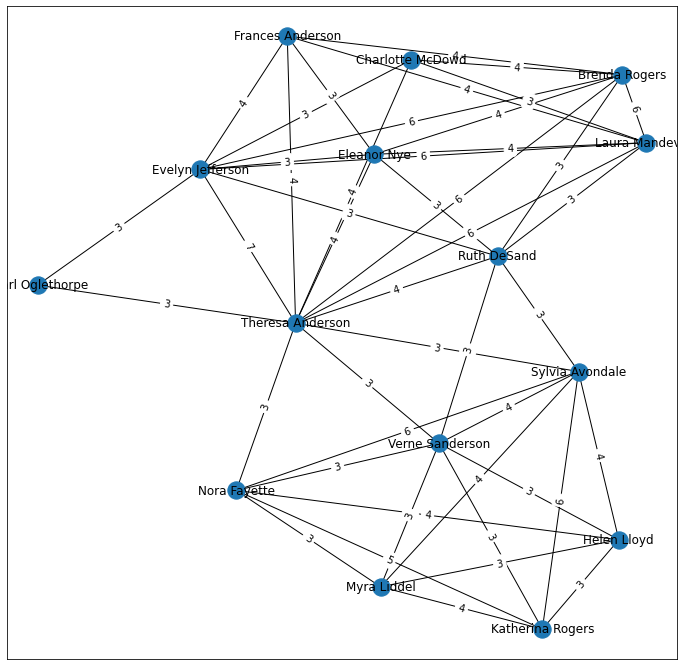

In [18]:
#nx.draw_kamada_kawai(W, with_labels=True)
#here we are walking along all the edges, for each edge in W.edges
#if the weight is greater than two we keep it
#each one of the edges has a start node and end node, then weight
#we see again weight = number of parties the women attended together

filtered_edges = [(u, v) for u, v, e in W.edges(data=True) if e["weight"] > 2]
fig=plt.figure(figsize=(12, 12))
W_filt = W.edge_subgraph(edges=filtered_edges)
pos = nx.layout.kamada_kawai_layout(W_filt)
nx.draw_networkx_nodes(W_filt, pos)
nx.draw_networkx_labels(W_filt, pos)
nx.draw_networkx_edges(W_filt, pos)

nx.draw_networkx_edge_labels(W_filt, 
                             pos=pos, 
                             edge_labels= nx.get_edge_attributes(W_filt, "weight"))

#above allows us to Draw the graph G with a Kamada-Kawai force-directed layout.
#again we are able to see the nodes and weights

Most importanly if we filter for only women who are 'closer friends', the layout shows us two groups of women
who are clustered together. This means each cluster of women have attended the same event(s) independently. 
We can assume two communities formed based on the layout output (based on attended more events together)
Secondly we see that Theresa and Ruth are layed out in the middle between the two formed communites,
which we can say they are most related to the two seperate communities.  

In [19]:
# Print Names of the women
print('Name of the woman:')
for name in women:
    print(name)
print()
# print names of the clubs
print('Name of the clubs:')
for name in clubs:
    print(name)


Name of the woman:
Evelyn Jefferson
Laura Mandeville
Theresa Anderson
Brenda Rogers
Charlotte McDowd
Frances Anderson
Eleanor Nye
Pearl Oglethorpe
Ruth DeSand
Verne Sanderson
Myra Liddel
Katherina Rogers
Sylvia Avondale
Nora Fayette
Helen Lloyd
Dorothy Murchison
Olivia Carleton
Flora Price

Name of the clubs:
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14


In [20]:
import pandas as pd
# get matrix for relationships between event and women
df=nx.to_pandas_adjacency(G, dtype=int)
df=df.iloc[:18,18:]

df.style

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Evelyn Jefferson,1,1,1,1,1,1,0,1,1,0,0,0,0,0
Laura Mandeville,1,1,1,0,1,1,1,1,0,0,0,0,0,0
Theresa Anderson,0,1,1,1,1,1,1,1,1,0,0,0,0,0
Brenda Rogers,1,0,1,1,1,1,1,1,0,0,0,0,0,0
Charlotte McDowd,0,0,1,1,1,0,1,0,0,0,0,0,0,0
Frances Anderson,0,0,1,0,1,1,0,1,0,0,0,0,0,0
Eleanor Nye,0,0,0,0,1,1,1,1,0,0,0,0,0,0
Pearl Oglethorpe,0,0,0,0,0,1,0,1,1,0,0,0,0,0
Ruth DeSand,0,0,0,0,1,0,1,1,1,0,0,0,0,0
Verne Sanderson,0,0,0,0,0,0,1,1,1,0,0,1,0,0


In [21]:
# Get information of each woman and events
IF=[list() for i in range(len(women))]
print(len(IF))
for club in clubs:
    for i in range(len(women)):
        if(df[club][i]==1):
            IF[i].append(club)
IF    

#walking over all the women and listing the event attended

18


[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9'],
 ['E1', 'E2', 'E3', 'E5', 'E6', 'E7', 'E8'],
 ['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'],
 ['E1', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
 ['E3', 'E4', 'E5', 'E7'],
 ['E3', 'E5', 'E6', 'E8'],
 ['E5', 'E6', 'E7', 'E8'],
 ['E6', 'E8', 'E9'],
 ['E5', 'E7', 'E8', 'E9'],
 ['E7', 'E8', 'E9', 'E12'],
 ['E8', 'E9', 'E10', 'E12'],
 ['E8', 'E9', 'E10', 'E12', 'E13', 'E14'],
 ['E7', 'E8', 'E9', 'E10', 'E12', 'E13', 'E14'],
 ['E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'],
 ['E7', 'E8', 'E10', 'E11', 'E12'],
 ['E8', 'E9'],
 ['E9', 'E11'],
 ['E9', 'E11']]

In [22]:
# Display information of each woman and events
for index in range(len(women)):
    string=', '.join([event for event in IF[index]])
    print(women[index] + ' at Event: \t' + string)
    
#from this we are able to see which/and how many events each individual woman attended

Evelyn Jefferson at Event: 	E1, E2, E3, E4, E5, E6, E8, E9
Laura Mandeville at Event: 	E1, E2, E3, E5, E6, E7, E8
Theresa Anderson at Event: 	E2, E3, E4, E5, E6, E7, E8, E9
Brenda Rogers at Event: 	E1, E3, E4, E5, E6, E7, E8
Charlotte McDowd at Event: 	E3, E4, E5, E7
Frances Anderson at Event: 	E3, E5, E6, E8
Eleanor Nye at Event: 	E5, E6, E7, E8
Pearl Oglethorpe at Event: 	E6, E8, E9
Ruth DeSand at Event: 	E5, E7, E8, E9
Verne Sanderson at Event: 	E7, E8, E9, E12
Myra Liddel at Event: 	E8, E9, E10, E12
Katherina Rogers at Event: 	E8, E9, E10, E12, E13, E14
Sylvia Avondale at Event: 	E7, E8, E9, E10, E12, E13, E14
Nora Fayette at Event: 	E6, E7, E9, E10, E11, E12, E13, E14
Helen Lloyd at Event: 	E7, E8, E10, E11, E12
Dorothy Murchison at Event: 	E8, E9
Olivia Carleton at Event: 	E9, E11
Flora Price at Event: 	E9, E11


In [23]:
# print out number of events each pair of women attended together (after filtering for pairs where they were at 3 or more)
for e in W_filt.edges(data=True):
    print(e)

('Evelyn Jefferson', 'Eleanor Nye', {'weight': 3})
('Evelyn Jefferson', 'Charlotte McDowd', {'weight': 3})
('Evelyn Jefferson', 'Frances Anderson', {'weight': 4})
('Evelyn Jefferson', 'Pearl Oglethorpe', {'weight': 3})
('Evelyn Jefferson', 'Theresa Anderson', {'weight': 7})
('Evelyn Jefferson', 'Brenda Rogers', {'weight': 6})
('Evelyn Jefferson', 'Laura Mandeville', {'weight': 6})
('Evelyn Jefferson', 'Ruth DeSand', {'weight': 3})
('Laura Mandeville', 'Eleanor Nye', {'weight': 4})
('Laura Mandeville', 'Charlotte McDowd', {'weight': 3})
('Laura Mandeville', 'Frances Anderson', {'weight': 4})
('Laura Mandeville', 'Theresa Anderson', {'weight': 6})
('Laura Mandeville', 'Brenda Rogers', {'weight': 6})
('Laura Mandeville', 'Ruth DeSand', {'weight': 3})
('Theresa Anderson', 'Eleanor Nye', {'weight': 4})
('Theresa Anderson', 'Sylvia Avondale', {'weight': 3})
('Theresa Anderson', 'Nora Fayette', {'weight': 3})
('Theresa Anderson', 'Charlotte McDowd', {'weight': 4})
('Theresa Anderson', 'France

## Conclusion
From last 'W_filt.edges' printed out number of events each pair of women attended together (after filtering for pairs where they were at 3 or more) we are able to conclude that based on largest weight=7, attended the most same events  
***('Evelyn Jefferson', 'Theresa Anderson', {'weight': 7})***

Again, most importanly if we filter for only women who are 'closer friends', the layout shows us two groups of women
who are clustered together. This means each cluster of women have attended the same event(s) independently. 
We can assume two communities formed based on the layout output (based on attended more events together)

### Reference
A. Davis, Gardner, B. B., Gardner, M. R., 1941. Deep South. University of Chicago Press, Chicago, IL.